In [2]:
!pip install albumentations opencv-python matplotlib


In [8]:
import cv2
import os
import random
import matplotlib.pyplot as plt
from albumentations import (
    Compose, HorizontalFlip, VerticalFlip, RandomRotate90, RandomBrightnessContrast,
    GaussianBlur, RandomGamma, HueSaturationValue, ShiftScaleRotate
)


input_dir = "original image"
output_dir = "augmented_images"
os.makedirs(output_dir, exist_ok=True)


transform = Compose([
    HorizontalFlip(p=0.5),
    VerticalFlip(p=0.2),
    RandomRotate90(p=0.5),
    RandomBrightnessContrast(p=0.5),
    GaussianBlur(p=0.3),
    RandomGamma(p=0.5),
    HueSaturationValue(p=0.5),
    ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=30, p=0.5)
])


num_augmented = 5  

for img_name in os.listdir(input_dir):
    img_path = os.path.join(input_dir, img_name)
    image = cv2.imread(img_path)
    if image is None:
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for i in range(num_augmented):
        augmented = transform(image=image)
        aug_image = augmented["image"]

        save_name = f"{os.path.splitext(img_name)[0]}_aug_{i}.jpg"
        cv2.imwrite(os.path.join(output_dir, save_name), cv2.cvtColor(aug_image, cv2.COLOR_RGB2BGR))

print("✅ Data Augmentation Complete!")


✅ Data Augmentation Complete!


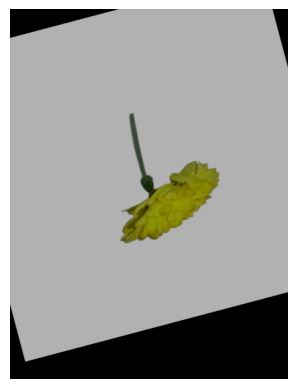

In [15]:
sample_img = random.choice(os.listdir(output_dir))
img = cv2.imread(os.path.join(output_dir, sample_img))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
